# **INVESTIGATE HOTEL BUSINESS USING DATA VISUALIZATION**

## **I. PREPARATION**

### **1.1 Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
import matplotlib
matplotlib.__version__

'3.2.2'

In [4]:
pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.4 MB 7.2 MB/s 
     |████████████████████████████████| 295 kB 3.9 MB/s 
     |████████████████████████████████| 965 kB 44.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **1.2 Load Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MP2. Investigate Hotel Business using Data Visualization/hotel_bookings_data.csv')

In [ ]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
62215,City Hotel,1,545,2019,March,1,5,0,2,2,0.0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,Non Refund,1.0,NaN,0,Personal,62.0,0,0,Canceled
5460,Resort Hotel,1,87,2018,June,18,29,2,5,2,0.0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,Non Refund,71.0,NaN,0,Personal,58.0,0,0,Canceled
75988,City Hotel,1,301,2017,October,33,14,0,2,2,0.0,0,Dinner,Kota Denpasar,Offline TA/TO,TA/TO,0,1,0,0,Non Refund,6.0,NaN,0,Family,101.5,0,0,Canceled
116794,City Hotel,0,4,2019,September,29,22,2,1,2,0.0,0,No Meal,Kota Jakarta Barat,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,160.0,0,2,Check-Out
20126,Resort Hotel,0,7,2018,March,3,14,0,3,2,0.0,0,Breakfast,Kabupaten Magelang,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,67.5,1,1,Check-Out


## **II. EXPLORATORY DATA ANALYSIS (EDA)**

### **2.1  General Information of DataFrame**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Observation Results:**
1. The data consist of 119390 rows and 29 columns.
2. Features children, agent, and company should be integer instead of float.


### **2.3 Descriptive Statistics**

In [ ]:
# Features with object data type
cats = ['hotel','arrival_date_month','meal','city','market_segment','distribution_channel',
        'deposit_type','customer_type','reservation_status']

In [ ]:
df[cats].describe()

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,79330,13877,92310,48590,56477,97870,104641,89613,75166


In [ ]:
for col in cats:
  print(f'Value count column: {col}')
  print(df[col].value_counts())
  print()

Value count column: hotel
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

Value count column: arrival_date_month
October      13877
September    12661
July         11791
December     11160
June         11089
August       10939
November     10508
May           9794
April         8068
January       6794
February      6780
March         5929
Name: arrival_date_month, dtype: int64

Value count column: meal
Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64

Value count column: city
Kota Denpasar              48590
Kabupaten Bangka           12129
Kota Yogyakarta            10415
Kota Batu                   8568
Kabupaten Bandung           7287
                           ...  
Kabupaten Malang               1
Kabupaten Bekasi               1
Kabupaten Barito Kuala         1
Kota Palembang                 1
Kabupaten Maluku Tengah        1
Name: city, Length: 177, dtype: int64

Value count column

**Observation Results:**
There is an incorrect value in the feature *meal*, *market segment*, and *distribution_channel* (Undefined), the undefined value in the feature *meal* will be changed to 'No Meal' while the rest will be dropped because the amount is not significant.

## **III. DATA PREPROCESSING**

### **3.1 Handle Null Values**

In [ ]:
null = df.isnull().sum()
df_null = pd.DataFrame()
df_null['cols'] = null[null>0].index
df_null['null_values'] = null[null>0].values
df_null['pct'] = df_null['null_values']/df.shape[0]*100

df_null.sort_values(by='pct',ascending=False)

,cols,null_values,pct
3,company,112593,94.306893
2,agent,16340,13.686238
1,city,488,0.408744
0,children,4,0.003350


**Handling Null values**:
- Null values in *company* and *agent* means that the booking didn't came from travel agent, then it will be imputed a value of 0.
- Null values in city and children have a small percentage then I'll drop it.

In [ ]:
# Handling null values features 'company' & 'agent'
cols = ['company', 'agent']
for col in cols:
  df[col].fillna(0, inplace=True)

# Handling null values feature 'city' & 'children'
df.dropna(subset=['city','children'], inplace=True)

### **3.2 Handle Error Values**

In [ ]:
# Replace value 'Unfefined' with 'No Meal'
df['meal'] = df['meal'].replace('Undefined','No Meal')

# Drop undefined value in distribution_channel feature
df.drop(df[df['distribution_channel']=='Undefined'].index, inplace=True)

# Drop undefined value in market_segment feature
df.drop(df[df['market_segment']=='Undefined'].index, inplace=True)

### **3.3 Change Data Type**

In [ ]:
# Change data type of 'children', 'agent' and 'company'
cols = ['children','agent','company']
df[cols] = df[cols].astype(int)

### **3.4 Feature Engineering**

In [ ]:
# Create new column 'total_guests' from the combination of 'adults', 'children', 'babies' columns
df['total_guests'] = df['adults'] + df['children'] + df['babies']

# Create new column 'stay_duration' from the combination of 'stays_in_weekend_nights' and 'stays_in_weekdays_nights'
df['stay_duration'] = df['stays_in_weekdays_nights'] + df['stays_in_weekend_nights']

In [ ]:
# Check if there is data with total_guest 0 and stay_duration 0
print('Data with total guest 0:', round(df[df['total_guests']==0].shape[0]/df.shape[0]*100,2), '%')
print('Data with total stay duration 0:', round(df[df['stay_duration']==0].shape[0]/df.shape[0]*100,2), '%')

# The percentage of error data is small, so I will drop the data

Data with total guest 0: 0.14 %
Data with total stay duration 0: 0.59 %


In [ ]:
# Drop unnecessary data with 0 guest and data with 0 night
df.drop(df[df['total_guests']==0].index, inplace=True)
df.drop(df[df['stay_duration']==0].index, inplace=True)

In [ ]:
# Check data after preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118087 entries, 2 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118087 non-null  object 
 1   is_canceled                     118087 non-null  int64  
 2   lead_time                       118087 non-null  int64  
 3   arrival_date_year               118087 non-null  int64  
 4   arrival_date_month              118087 non-null  object 
 5   arrival_date_week_number        118087 non-null  int64  
 6   arrival_date_day_of_month       118087 non-null  int64  
 7   stays_in_weekend_nights         118087 non-null  int64  
 8   stays_in_weekdays_nights        118087 non-null  int64  
 9   adults                          118087 non-null  int64  
 10  children                        118087 non-null  int64  
 11  babies                          118087 non-null  int64  
 12  meal            

## **IV. ANALYSIS USING DATA VISUALIZATION**

### **4.1 Monthly Hotel Booking Analysis Based on Hotel Type**

In [ ]:
dfg = df.groupby(['hotel','arrival_date_month'])['arrival_date_year'].agg(['nunique','count']).reset_index()
dfg.columns = ['hotel_type','arrival_month','unique_year','total_booking']
dfg

,hotel_type,arrival_month,unique_year,total_booking
0,City Hotel,April,2,4917
1,City Hotel,August,2,7874
2,City Hotel,December,2,7540
3,City Hotel,February,2,4097
4,City Hotel,January,2,4307
5,City Hotel,July,2,8184
6,City Hotel,June,2,7458
7,City Hotel,March,2,3712
8,City Hotel,May,2,6411
9,City Hotel,November,2,7377


**Observation Result:**
Data for October and September were taken from 3 different years of data, while the others were taken from 2 different years of data. Then the data needs to be normalized by calculating the average of the total bookings obtained from the total bookings divided by the number of unique years so that the comparison can be done properly.

In [ ]:
# Normalize the data
dfg['avg_booking'] = round(dfg['total_booking']/dfg['unique_year'],2)
dfg

,hotel_type,arrival_month,unique_year,total_booking,avg_booking
0,City Hotel,April,2,4917,2458.50
1,City Hotel,August,2,7874,3937.00
2,City Hotel,December,2,7540,3770.00
3,City Hotel,February,2,4097,2048.50
4,City Hotel,January,2,4307,2153.50
5,City Hotel,July,2,8184,4092.00
6,City Hotel,June,2,7458,3729.00
7,City Hotel,March,2,3712,1856.00
8,City Hotel,May,2,6411,3205.50
9,City Hotel,November,2,7377,3688.50


In [ ]:
# Sort data by month and abbreviate Month for easier visualization.
sort_month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

dfg['arrival_month'] = dfg['arrival_month'].str[:3]
dfg.index = pd.CategoricalIndex(dfg['arrival_month'], categories=sort_month, ordered=True)
dfg = dfg.sort_index().reset_index(drop=True)

,hotel_type,arrival_month,unique_year,total_booking,avg_booking
0,City Hotel,Jan,2,4307,2153.50
1,Resort Hotel,Jan,2,2366,1183.00
2,City Hotel,Feb,2,4097,2048.50
3,Resort Hotel,Feb,2,2545,1272.50
4,City Hotel,Mar,2,3712,1856.00
5,Resort Hotel,Mar,2,2104,1052.00
6,City Hotel,Apr,2,4917,2458.50
7,Resort Hotel,Apr,2,3027,1513.50
8,Resort Hotel,May,2,3251,1625.50
9,City Hotel,May,2,6411,3205.50


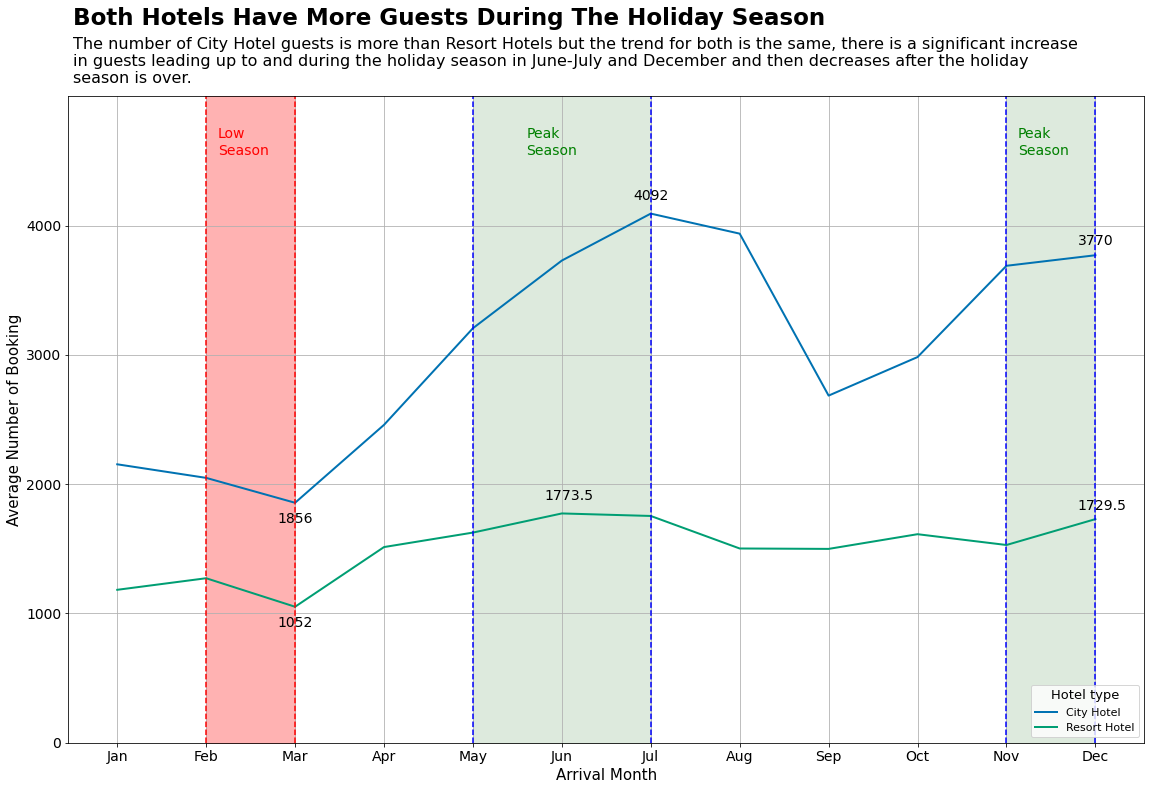

In [ ]:
style.use('seaborn-colorblind')

plt.figure(figsize=(17,11))
sns.lineplot(x='arrival_month', y='avg_booking', hue='hotel_type', size='hotel_type', sizes=(2, 2), data=dfg)

plt.text(x=-0.5, y=5550, s='Both Hotels Have More Guests During The Holiday Season',
        fontsize=23, weight='bold')
plt.text(x=-0.5, y=5100, s='The number of City Hotel guests is more than Resort Hotels but the trend '
 'for both is the same, there is a significant increase \nin guests leading up to and during the holiday ' 
 'season in June-July and December and then decreases after the holiday \nseason is over.',
  fontsize=16)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()
plt.legend(title='Hotel type', title_fontsize=13, prop={'size':11}, loc='lower right')

plt.xlabel('Arrival Month', fontsize=15)
plt.ylabel('Average Number of Booking', fontsize=15)

plt.ylim(0,5000)
plt.yticks([i for i in range(0,5000,1000)])

plt.text(x=1.8, y=1700, s='1856', fontsize=14, color='black')
plt.text(x=1.8, y=900, s='1052', fontsize=14, color='black')

plt.text(x=5.8, y=4200, s='4092', fontsize=14, color='black')
plt.text(x=4.8, y=1880, s='1773.5', fontsize=14, color='black')

plt.text(x=10.8, y=3850, s='3770', fontsize=14, color='black')
plt.text(x=10.8, y=1800, s='1729.5', fontsize=14, color='black')

plt.axvline(1, ls='--', color='red')
plt.axvline(2, ls='--', color='red')
plt.stackplot(np.arange(1,3,1), [[5000]], color='red', alpha=0.3)
plt.text(x=1.13, y=4550, s='Low\nSeason', fontsize=14, color='red')

plt.axvline(4, ls='--', color='blue')
plt.axvline(6, ls='--', color='blue')
plt.stackplot(np.arange(4,7,1), [[5000]], color='darkseagreen', alpha=0.3)
plt.text(x=4.6, y=4550, s='Peak\nSeason', fontsize=14, color='green')

plt.axvline(10, ls='--', color='blue')
plt.axvline(11, ls='--', color='blue')
plt.stackplot(np.arange(10,12,1), [[5000]], color='darkseagreen', alpha=0.3)
plt.text(x=10.13, y=4550, s='Peak\nSeason', fontsize=14, color='green')

plt.tight_layout()
#plt.savefig('/content/drive/MyDrive/MP2.  Investigate Hotel Business using Data Visualization/Fig1.png', dpi=200);

**Observation Results:**
<div align='justify'>

1. The number of city hotel guests is more than resort hotels, this may be because the majority of city hotel customers are tourists on the go or business travelers. While at the resort, there are more vacationers so that there will be more guests at certain holiday times. However the trend for both is the same.

2. The peak season for hotel guests occurs twice, the first occurs in June-July which is probably due to the first semester holidays for students in Indonesia, the second occurs in December which occurs due to the Christmas and New Year holidays.

3. Low season occurs in February-March, this is likely because the holidays have ended and this month is not a busy time for business travel as it is still the beginning of the year.

4. To optimize hotel resources during low season, this can be done by providing early year holiday promos.

### **4.2. Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates**

In [ ]:
df['stay_duration'].value_counts()

2     27518
3     27013
1     20781
4     17353
7      8626
5      7751
6      3839
8      1151
10     1131
14      910
9       837
11      392
12      220
13      139
21       71
15       71
16       40
25       37
18       35
28       34
19       22
17       20
20       14
29       13
30       13
22       13
23        8
26        6
24        6
35        5
42        4
27        4
33        3
56        2
45        1
38        1
46        1
48        1
34        1
Name: stay_duration, dtype: int64

**Observation Results:**
Mostly people stays in hotel for less than a week. Therefore, we'd better make a threshold based on the week.

In [ ]:
def stay_cats(x):
  if x < 8:
    stay_cats = '1 week'
  elif x < 15:
    stay_cats = '2 weeks'
  elif x < 22:
    stay_cats = '3 weeks'
  elif x < 29:
    stay_cats = '4 weeks'
  else:
    stay_cats = '> 4 weeks'
  return stay_cats

In [ ]:
df['stay_cats'] = df['stay_duration'].apply(lambda x: stay_cats(x))

In [ ]:
df[['stay_duration','stay_cats']].sample(5)

,stay_duration,stay_cats
17740,1,1 week
23308,7,1 week
34271,7,1 week
39912,10,2 weeks
34574,14,2 weeks


In [ ]:
dfc = df.groupby(['hotel','stay_cats','is_canceled']).is_canceled.count().reset_index(name='total_cancel')
dfc['cancel_rate'] = round(dfc['total_cancel']/dfc.groupby(['hotel','stay_cats'])['total_cancel'].transform('sum')*100,2)
dfc = dfc[dfc['is_canceled']==1]
dfc

,hotel,stay_cats,is_canceled,total_cancel,cancel_rate
1,City Hotel,1 week,1,32373,41.69
3,City Hotel,2 weeks,1,558,52.20
5,City Hotel,3 weeks,1,76,72.38
7,City Hotel,4 weeks,1,21,84.00
9,City Hotel,> 4 weeks,1,20,90.91
11,Resort Hotel,1 week,1,9865,28.01
13,Resort Hotel,2 weeks,1,1077,29.02
15,Resort Hotel,3 weeks,1,79,47.02
17,Resort Hotel,4 weeks,1,39,46.99
19,Resort Hotel,> 4 weeks,1,7,30.43


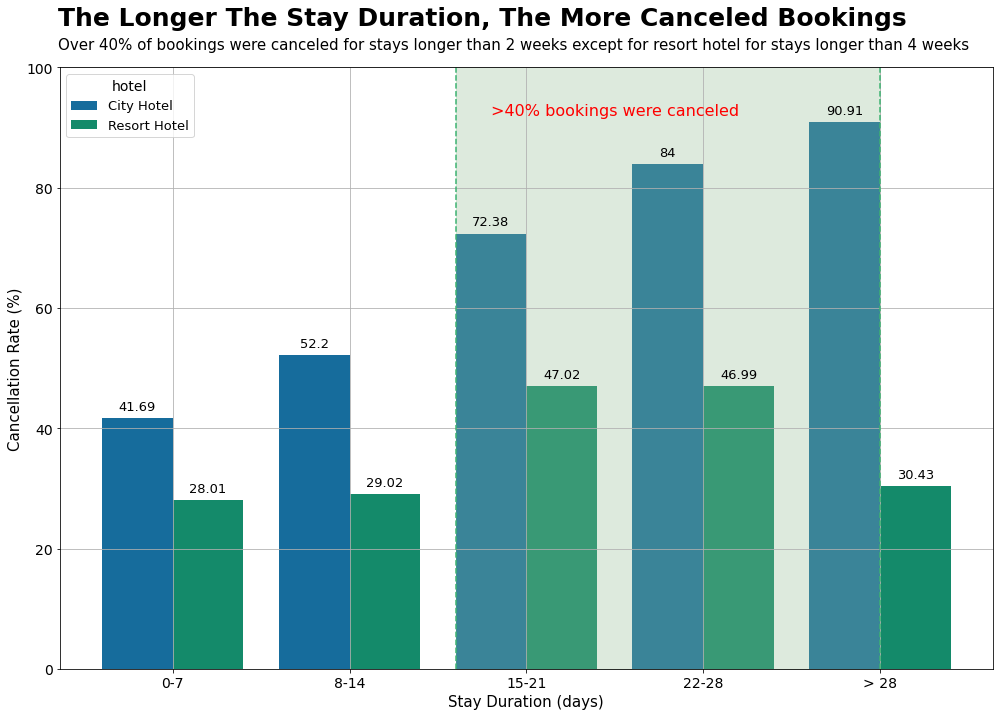

In [ ]:
style.use('seaborn-colorblind')
fig, ax = plt.subplots(figsize=(15,10))

sns.barplot(x='stay_cats', y='cancel_rate', hue='hotel', data=dfc)

plt.bar_label(ax.containers[0], padding=5, fontsize=13)
plt.bar_label(ax.containers[1], padding=5, fontsize=13)


plt.text(x=-0.65, y=107, s='The Longer The Stay Duration, The More Canceled Bookings', fontsize=25,
         fontweight='bold')
plt.text(x=-0.65, y=103, s='Over 40% of bookings were canceled for stays longer than 2 weeks except for'
        ' resort hotel for stays longer than 4 weeks', fontsize=15, fontweight='light')

plt.grid()
plt.ylim(0,100)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(np.arange(5), ['0-7', '8-14', '15-21', '22-28', '> 28'])

plt.xlabel('Stay Duration (days)', fontsize=15)
plt.ylabel('Cancellation Rate (%)', fontsize=15)

plt.legend(title='hotel', title_fontsize=14, prop={'size':13})

plt.axvline(1.6, ls='--', color='mediumseagreen')
plt.axvline(4, ls='--', color='mediumseagreen')
plt.stackplot(np.arange(1.6,4.2,0.2), [[100]], color='darkseagreen', alpha=0.3)
plt.text(x=1.8, y=92, s='>40% bookings were canceled', fontsize=16, color='red')

plt.tight_layout()
#plt.savefig('/content/drive/MyDrive/MP2. Investigate Hotel Business using Data Visualization/Fig2.png', dpi=200);

**Observation Results:**
<div align='justify'>

1.   Most of the cancellation rate is dominated by city hotel bookings, the difference in cancellation rates between city hotels and resort hotels can be caused by different types of visitors, city hotel visitors make hotels only as a stopover to rest while resort hotel visitors are usually tourists who make resort hotels as a vacation place so their commitment to order is higher.

2. Over 40% of bookings were canceled for stays longer than 2 weeks except for resort hotel for stays longer than 4 weeks.

3.   Both types of hotels have a positive correlation for cancellation rate and stay duration, but the relationship is more significant for city hotels. This happen because the longer the duration of the stay, the more expensive the hotel bill will be. The customer may check other alternatives as a price comparison and this results in canceling the hotel booking.

4.  To reduce cancellation rates, we could offer non-refundable rates for long stay bookings. However, these rates will be cheaper than standard rates which allow free cancellation. Customers who make non-refundable reservations are generally more committed to their stay because they have to pay if they cancel, make changes, or don't show up.


### **4.3. Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate**

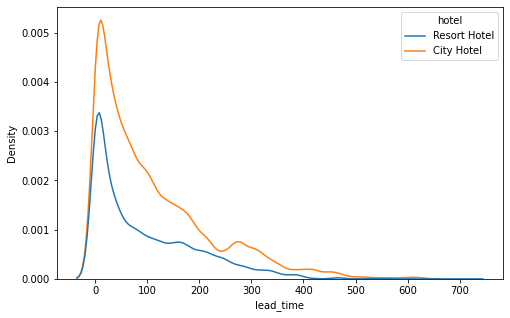

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(x=df['lead_time'], hue=df['hotel']);

**Observation Results:**
The data distribution looks skewed to the right, so it will be easier if we categorize it per month.

In [ ]:
def lead_cats(x):
   if x < 30:
     lead_cats = '<1 month'
   elif x <= 90:
     lead_cats = '1-3 months'
   elif x <= 150:
     lead_cats = '3-5 months'
   elif x <= 210:
     lead_cats = '5-7 months'
   elif x <= 270:
     lead_cats = '7-9 months'
   elif x <= 330:
     lead_cats = '9-11 month'
   else:
     lead_cats = '>11 months'
   return lead_cats

In [ ]:
df['lead_cats'] = df['lead_time'].apply(lambda x: lead_cats(x))

In [ ]:
df[['lead_time','lead_cats']].sample(5)

,lead_time,lead_cats
86687,55,1-3 months
82059,21,<1 month
101736,13,<1 month
22286,56,1-3 months
7872,127,3-5 months


In [ ]:
dfl = df.groupby(['hotel','lead_cats','is_canceled']).is_canceled.count().reset_index(name='total_cancel')
dfl['cancel_rate'] = round(dfl['total_cancel']/dfl.groupby(['hotel','lead_cats']).total_cancel.transform('sum')*100,2)
dfl = dfl[dfl['is_canceled']==1]
dfl = dfl.sort_values(by=['hotel','cancel_rate'])
dfl

,hotel,lead_cats,is_canceled,total_cancel,cancel_rate
11,City Hotel,<1 month,1,4986,22.08
1,City Hotel,1-3 months,1,8481,40.04
3,City Hotel,3-5 months,1,6028,46.21
5,City Hotel,5-7 months,1,4495,51.48
7,City Hotel,7-9 months,1,2517,54.50
9,City Hotel,9-11 month,1,3463,74.70
13,City Hotel,>11 months,1,3078,75.35
25,Resort Hotel,<1 month,1,1897,13.10
15,Resort Hotel,1-3 months,1,2890,32.58
19,Resort Hotel,5-7 months,1,1653,34.93


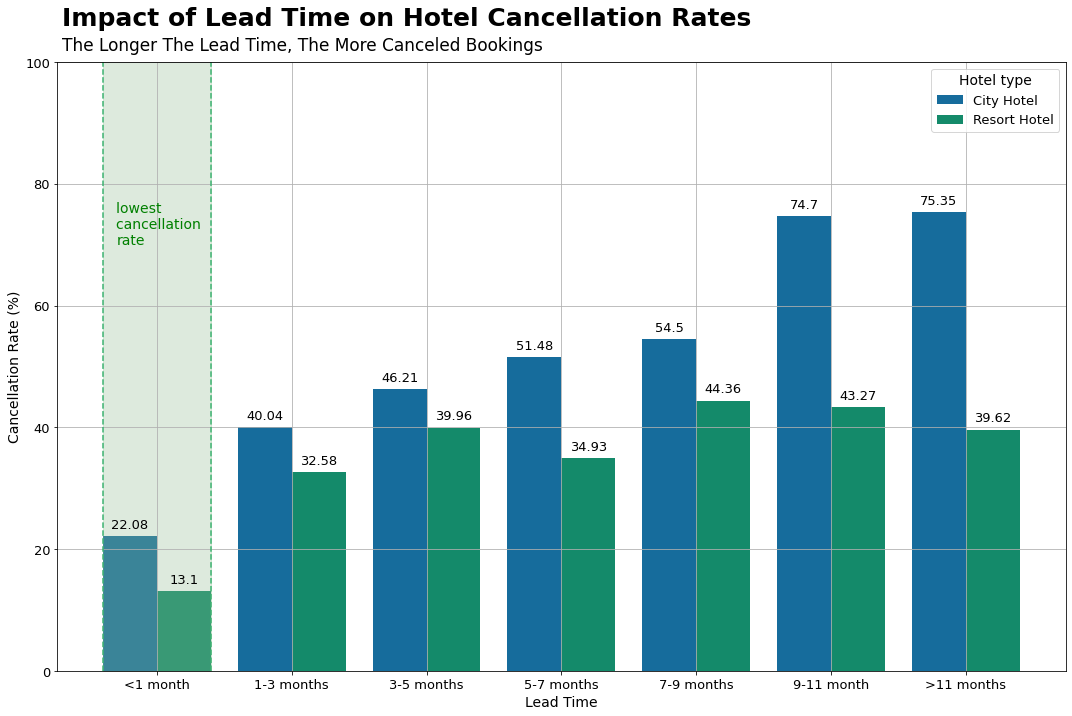

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
style.use('seaborn-colorblind')

sns.barplot(x='lead_cats', y='cancel_rate', hue='hotel', data=dfl)
plt.grid()
plt.ylim(0,100)
plt.text(x=-0.7, y=106, s='Impact of Lead Time on Hotel Cancellation Rates', fontsize=25, weight='bold')
plt.text(x=-0.7, y=102, s='The Longer The Lead Time, The More Canceled Bookings', fontsize=17, weight='light')

plt.bar_label(ax.containers[0], padding=5, fontsize=13)
plt.bar_label(ax.containers[1], padding=5, fontsize=13)

plt.legend(title='Hotel type', title_fontsize=14, prop=({'size':13}))
plt.xlabel('Lead Time', fontsize=14)
plt.ylabel('Cancellation Rate (%)', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=13)

plt.axvline(-0.4, ls='--', color='mediumseagreen')
plt.axvline(0.4, ls='--', color='mediumseagreen')
plt.stackplot(np.arange(-0.4,0.5,0.1), [[100]], color='darkseagreen', alpha=0.3)
plt.text(x=-0.3, y=70, s='lowest \ncancellation \nrate', fontsize=14, color='green')

plt.tight_layout()
#plt.savefig('/content/drive/MyDrive/MP2. Investigate Hotel Business using Data Visualization/Fig3.png', dip=200);

**Observation Results:**
<div align='justify'>

1. Most of the cancellation rate is dominated by city hotel bookings, the difference in cancellation rates between city hotels and resort hotels can be caused by different types of visitors.

2. Both types of hotels have a positive correlation for cancellation rate and lead time, but the relationship is more significant for city hotels. The longer the lead time, the more likely the bookings will be cancelled,  this could happen because the customer has more time to change their mind about the booking, or something else happened in that period of lead time that would disrupt their travel plans, or maybe they just forgot about the booking.

3. Lead time less than 1 month has the lowest cancel rate, this value needs to be maintained.

4. Referring to the average hotel cancellation rate in [2018 which was 39.6%](https://www.phocuswire.com/Hotel-distribution-market-share-distribution-analysis#:~:text=On%20The%20Rise-,Hotel%20cancelation%20rate%20at%2040%25%20as%20online,agencies%20push%20free%20change%20policy&text=One%20in%20four%20hotel%20guests,tactics%20of%20online%20travel%20agencies.), the lead time above 1 month for city hotels and above 3 months for resort hotels had a poor cancellation rate.

5. Things that can be done to prevent cancellation:
  - Set the maximum booking lead time.
  - Placing a booking deposit requirement for a lead time >1 month for city hotels and >3 months for resort hotels.
  - Set limitation for the cancellation period.